In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
from sqlalchemy import inspect

inspector = inspect(engine)
m_column_names = inspector.get_columns('Measurement')
s_column_names = inspector.get_columns('Station')

# Check names of columns in both tables
print('Measurement Columns:')
for c in m_column_names:
    print(c['name'])
print('')
print('Station Columns:')
for c in s_column_names:
    print(c['name'])

Measurement Columns:
id
station
date
prcp
tobs

Station Columns:
id
station
name
latitude
longitude
elevation


In [5]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
jun_query = session.query(Measurement.date, Measurement.tobs).filter(
    ((Measurement.date >= '2010-06-01') & (Measurement.date <= '2010-06-30')) 
    | ((Measurement.date >= '2011-06-01') & (Measurement.date <= '2011-06-30')) 
    | ((Measurement.date >= '2012-06-01') & (Measurement.date <= '2012-06-30')) 
    | ((Measurement.date >= '2013-06-01') & (Measurement.date <= '2013-06-30')) 
    | ((Measurement.date >= '2014-06-01') & (Measurement.date <= '2014-06-30')) 
    | ((Measurement.date >= '2015-06-01') & (Measurement.date <= '2015-06-30')) 
    | ((Measurement.date >= '2016-06-01') & (Measurement.date <= '2016-06-30')) 
    | ((Measurement.date >= '2017-06-01') & (Measurement.date <= '2017-06-30'))).all()

In [6]:
# 2. Write a *better* query that filters the Measurement table to retrieve the temperatures for the month of June.
regex_jun_query = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.like('%-06-%'))

In [7]:
#  3. Convert the June temperatures to a list.
jun_results = []
jun_results = regex_jun_query

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
jun_df = pd.DataFrame(jun_results, columns=['Date','Temperature'])

In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_df.describe()

,Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


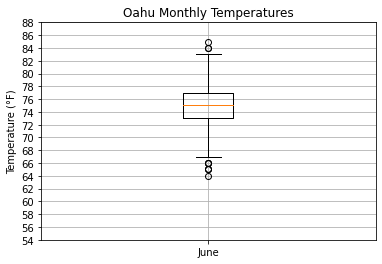

In [10]:
# Create a box-and-whisker plot for the June data.
x_labels = ["June"]
fig, ax = plt.subplots()
ax.boxplot(jun_df['Temperature'], labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Oahu Monthly Temperatures')
ax.set_ylabel('Temperature (°F)')
ax.set_yticks(np.arange(54, 90, step=2.0))
ax.grid()
plt.show()

## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
regex_dec_query = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.like('%-12-%'))

In [12]:
# 7. Convert the December temperatures to a list.
dec_results = []
dec_results = regex_dec_query

In [13]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['Date','Temperature'])

In [14]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


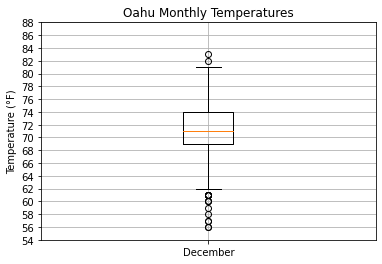

In [15]:
# Create a box-and-whisker plot for the December data.
x_labels = ["December"]
fig, ax = plt.subplots()
ax.boxplot(dec_df['Temperature'], labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Oahu Monthly Temperatures')
ax.set_ylabel('Temperature (°F)')
ax.set_yticks(np.arange(54, 90, step=2.0))
ax.grid()
plt.show()

## Deliverable 3 Tests

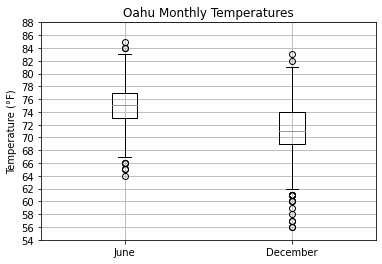

In [16]:
# Create a box-and-whisker plot for both months data.
x_labels = ["June", "December"]
temp_data = [jun_df['Temperature'],dec_df['Temperature']]
fig, ax = plt.subplots()
ax.boxplot(temp_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Oahu Monthly Temperatures')
ax.set_ylabel('Temperature (°F)')
ax.set_yticks(np.arange(54, 90, step=2.0))
ax.grid()

# Save the figure.
plt.savefig("Resources/Fig1.png")
plt.show()

In [17]:
# Checking how to include precipitation into the summary -- for Deliverable 3
extra_dec_query = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(Measurement.date.like('%-12-%'))
extra_dec_results = []
extra_dec_results = extra_dec_query
extra_dec_df = pd.DataFrame(extra_dec_results, columns=['Date','Temperature','Precipitation'])
extra_dec_df.describe()

,Temperature,Precipitation
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [18]:
# Figure out the different elevation values of the 9 stations
session.query(Station.elevation).all()

[(3.0,),
 (14.6,),
 (7.0,),
 (11.9,),
 (306.6,),
 (19.5,),
 (32.9,),
 (0.9,),
 (152.4,)]

In [19]:
# Test query syntax joining Measurement and Station tables
session.query(Measurement.date, Measurement.tobs, Measurement.prcp, Station.elevation).filter(Measurement.station==Station.station).filter(Measurement.date.like('%-12-%')).all()

[('2010-12-01', 76.0, 0.04, 3.0),
 ('2010-12-03', 74.0, 0.0, 3.0),
 ('2010-12-04', 74.0, 0.0, 3.0),
 ('2010-12-06', 64.0, 0.0, 3.0),
 ('2010-12-07', 64.0, 0.0, 3.0),
 ('2010-12-08', 67.0, 0.0, 3.0),
 ('2010-12-09', 77.0, 0.0, 3.0),
 ('2010-12-10', 66.0, 1.58, 3.0),
 ('2010-12-11', 69.0, 0.77, 3.0),
 ('2010-12-12', 68.0, 0.0, 3.0),
 ('2010-12-13', 68.0, 0.0, 3.0),
 ('2010-12-14', 71.0, 0.0, 3.0),
 ('2010-12-15', 74.0, 0.0, 3.0),
 ('2010-12-16', 67.0, 0.0, 3.0),
 ('2010-12-17', 66.0, 0.0, 3.0),
 ('2010-12-18', 69.0, 0.0, 3.0),
 ('2010-12-19', 71.0, 1.4, 3.0),
 ('2010-12-23', 70.0, 0.0, 3.0),
 ('2010-12-24', 70.0, 0.0, 3.0),
 ('2010-12-26', 74.0, None, 3.0),
 ('2010-12-27', 74.0, 0.13, 3.0),
 ('2010-12-28', 71.0, 0.55, 3.0),
 ('2010-12-29', 75.0, 0.06, 3.0),
 ('2010-12-30', 75.0, 0.01, 3.0),
 ('2010-12-31', 72.0, 0.0, 3.0),
 ('2011-12-01', 69.0, 0.03, 3.0),
 ('2011-12-02', 68.0, 0.08, 3.0),
 ('2011-12-03', 73.0, 0.0, 3.0),
 ('2011-12-04', 74.0, 0.0, 3.0),
 ('2011-12-05', 73.0, 0.0, 3.0),


In [20]:
# Checking how to limit to low elevations (<=50) in the summary -- for Deliverable 3
elevation_query = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(Measurement.station==Station.station).filter(Measurement.date.like('%-12-%')).filter(Station.elevation<=50).all()
elevation_results = []
elevation_results = elevation_query
elevation_df = pd.DataFrame(elevation_results, columns=['Date','Temperature','Precipitation'])
elevation_df.describe()

,Temperature,Precipitation
count,1292.000000,1197.000000
mean,71.300310,0.165188
std,3.775813,0.456738
min,56.000000,0.000000
25%,69.000000,0.000000
50%,72.000000,0.020000
75%,74.000000,0.110000
max,82.000000,4.950000


In [21]:
# Checking how to limit to high elevations (>50) in the summary -- for Deliverable 3
elevation_query = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(Measurement.station==Station.station).filter(Measurement.date.like('%-12-%')).filter(Station.elevation>50).all()
elevation_results = []
elevation_results = elevation_query
elevation_df = pd.DataFrame(elevation_results, columns=['Date','Temperature','Precipitation'])
elevation_df.describe()

,Temperature,Precipitation
count,225.000000,208.000000
mean,69.555556,0.513942
std,3.192874,0.823800
min,60.000000,0.000000
25%,68.000000,0.020000
50%,69.000000,0.155000
75%,71.000000,0.682500
max,83.000000,6.420000


In [22]:
# Check if latitudes and longitudes are for different islands, or all on the same island -- they are all on Oahu
session.query(Station.station, Station.latitude, Station.longitude).all()

[('USC00519397', 21.2716, -157.8168),
 ('USC00513117', 21.4234, -157.8015),
 ('USC00514830', 21.5213, -157.8374),
 ('USC00517948', 21.3934, -157.9751),
 ('USC00518838', 21.4992, -158.0111),
 ('USC00519523', 21.33556, -157.71139),
 ('USC00519281', 21.45167, -157.84888999999998),
 ('USC00511918', 21.3152, -157.9992),
 ('USC00516128', 21.3331, -157.8025)]